In [1]:
from ipynb.fs.full.arl_libq import *

## Stochastic Tests

Tests are not currently comprehensive nor rigorous. Outputs need to be checked by eye.

TESTS ARE ABLE TO RUN != CODE IS WORKING CORRECTLY

### test `zpf`

In [2]:
def check_expectations(arr: np.ndarray):
    # avg z
    exp_val = arr.mean()

    # avg z^T z for every column z in arr
    # if statement optimizes speed
    trans = np.trace((arr @ arr.T if arr.shape[0] < arr.shape[1] else arr.T @ arr)) / arr.shape[1]

    # avg z^H z for every column z in arr
    herm = np.linalg.norm(arr, axis=0).mean()
    
    print(f"E[z] = {exp_val} should be 0.")
    print(f"E[z^T z] = {trans} should be 0.")
    print(f"E[z^H z] = {herm} should be 1.")

In [3]:
vac = zpf(1000000, 2)
check_expectations(vac)

E[z] = (2.8633120139797902e-05+0.00016382948479257993j) should be 0.
E[z^T z] = (-0.0011180090355414314-0.0007353419101726742j) should be 0.
E[z^H z] = 0.9394192775580593 should be 1.


### test `threshold_detector` and `h_or_v_detector`

In [4]:
a = zpf(100,2)

#print(a)

td = threshold_detector(a, 1)
print(td)

hv = h_or_v_detector(a, 1)
print(hv)

td_any = td.any(axis=0)
assert(np.array_equal(hv, td_any))

[[False False  True False  True False False False False False False False
  False False False False False False False False False False False False
  False False False  True  True False False False  True False False False
  False False False False  True False False False False False False False
   True False False False False False  True False False False False False
  False False False False False False  True False False False False False
  False False False False False  True False False False  True False False
  False  True False  True  True False False False False False False False
   True False False False]
 [False False False False False False False False False  True False  True
  False False False False False  True False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
   True  True False False False False False False  True False  True False
  False Fal

### test `ent`, `zpf`, `pbs`, coincidence counters

In [5]:
l,r = ent(1000, 2)
lzpf = zpf(1000, 2)
rzpf = zpf(1000, 2)

In [6]:
lt, lr = pbs(l, lzpf)
rt, rr = pbs(r, rzpf)

dlt, dlr, drt, drr = map(h_or_v_detector, (lt, lr, rt, rr))
detections = np.array([dlt, dlr, drt, drr])

coincidence_counts = get_all_coincidence_counts(detections)
dlt_and_drt = sum([coincidence_counts[event] for event in [(1,0,1,0), (1,0,1,1), (1,1,1,0), (1,1,1,1)]])
assert(get_coincidence_count(detections[[0,2],]) == dlt_and_drt)

print_all_coincidence_counts(detections)


0000 49
0001 4
0010 2
0011 0
0100 3
0101 188
0110 0
0111 5
1000 1
1001 0
1010 185
1011 8
1100 0
1101 7
1110 9
1111 539


### simple `ent` postselection experiment

[[-0.0093058 -0.52589498j -1.28620436+1.89691355j  0.78751332+0.68338853j
  ...  1.02484768-0.49666285j -0.64288014+0.34369132j
  -0.40085626+0.81904416j]
 [-0.26911165-0.6850772j   0.11302424+0.87535009j -0.23136797+1.48384871j
  ...  0.6809255 +0.72503984j  0.96245823-1.63770204j
  -0.56488513-0.32051958j]]
[(True, False), (False, False), (True, True), (False, True)]
59972 postselected trials out of 1000000
[42084, 14263, 2742, 883]
['10', '00', '11', '01']
[0.7017274728206496, 0.23782765290468885, 0.045721336623757755, 0.014723537650903755]


<BarContainer object of 4 artists>

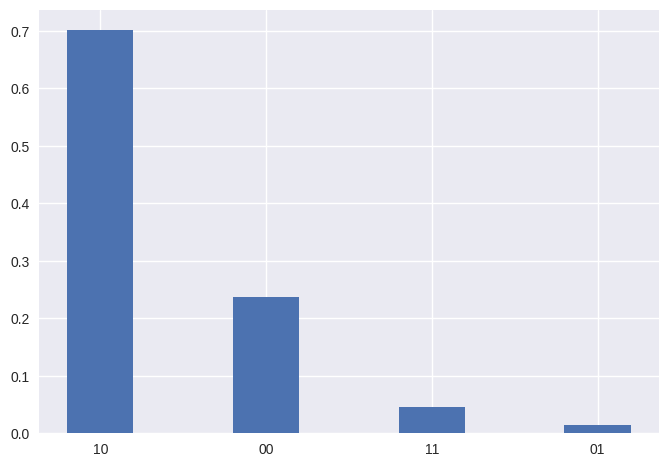

In [7]:
N = 1000000
l_ent,r_ent = ent(N=N, r=1, t=1, phase=0)
print(l_ent)
l_ent = polarizer(l_ent, theta=0, phi=0)
pbs_1,pbs_2 = pbs(r_ent)

dl = threshold_detector(l_ent, gamma=2.3).any(axis=0)
dr1 = threshold_detector(pbs_1, gamma=2.3).any(axis=0)
dr2 = threshold_detector(pbs_2, gamma=2.3).any(axis=0)

post_dr1 = dr1[dl]
post_dr2 = dr2[dl]

dets = np.block([[post_dr1],[post_dr2]])
counts = get_all_coincidence_counts(dets)
a = list(counts.keys())
b = list(counts.values())

labels = [''.join(('1' if det else '0') for det in tup) for tup in a]
values = [i/sum(b) for i in b]

print(a)
print(f'{sum(b)} postselected trials out of {N}')
print(b)
print(labels)
print(values)

plt.bar(labels, values, width = 0.4)

## QM Tests

Tests are not currently comprehensive nor rigorous. Outputs need to be checked by eye.

TESTS ARE ABLE TO RUN != CODE IS WORKING CORRECTLY

### test `get_fock_basis_states`

Takes a long time and eats up memory very quickly. The advantage of using `@cache` can be seen by running `get_fock_basis_states` twice in a row, or running it with smaller inputs after it finishes - after the first run, future calls are almost instantaneous.

In [8]:
num_src = 4
n = 2*num_src
m = 4*num_src
assert(len(get_fock_basis_states(n, m)) == fock_dim(n,m))
assert(len(get_antibunching_states(n,m)) == comb(m,n))

### test `qr_haar` and `HilbertSpaceUnitary`

In [9]:
U = qr_haar(100) #np.array([[0, 1], [1, 0]], dtype=complex)

#print(U)

UH = HilbertSpaceUnitary(U, 1)

zers = [0]*100
zert = [0]*100

zers[0] = 1
zert[5] = 1

zers = tuple(zers)
zert = tuple(zert)

print(zers)
print(is_fock_basis_state(zers))

print(abs(UH.get_entry(zers, zert))**2)
print(abs(UH[zers, zert])**2)

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
True
0.026603593434756535
0.026603593434756535


### test `get_hilbert_space_unitary_matrix`

In [10]:
hadamard = np.array([[1, 1], [1, -1]]) / sqrt(2)

print("Hadamard with 1 photon, 2 modes:")
hsu_had = get_hilbert_space_unitary_matrix(hadamard, 1, p=True) # p=True prints resulting unitary
print()

print("Hadamard with 2 photons, 2 modes:")
hsu_had = get_hilbert_space_unitary_matrix(hadamard, 2, p=True)
print()

m = 6
U = qr_haar(m)

print(f"Haar random unitary with 1 photon, {m} modes:")
hsu_haar = get_hilbert_space_unitary_matrix(U, 1, p=True)
print()

print(f"Haar random unitary with 2 photons, {m} modes:")
hsu_haar = get_hilbert_space_unitary_matrix(U, 2, p=True)
print()

Hadamard with 1 photon, 2 modes:
(1, 0):	[0.71-0.j 0.71-0.j]
(0, 1):	[ 0.71-0.j -0.71+0.j]

Hadamard with 2 photons, 2 modes:
(0, 2):	[ 0.5 +0.j -0.71+0.j  0.5 +0.j]
(1, 1):	[-0.71+0.j  0.  +0.j  0.71+0.j]
(2, 0):	[0.5 +0.j 0.71+0.j 0.5 +0.j]

Haar random unitary with 1 photon, 6 modes:
(1, 0, 0, 0, 0, 0):	[ 0.27+0.09j -0.51-0.27j  0.15+0.13j -0.04-0.1j  -0.43-0.35j  0.06-0.47j]
(0, 1, 0, 0, 0, 0):	[-0.02+0.33j -0.56+0.17j -0.31+0.09j  0.05+0.43j -0.04-0.07j  0.14+0.49j]
(0, 0, 1, 0, 0, 0):	[-0.04+0.34j -0.02+0.25j -0.03-0.11j  0.36+0.12j  0.39-0.35j -0.52-0.35j]
(0, 0, 0, 1, 0, 0):	[-0.26-0.49j -0.2 +0.39j -0.07-0.j   -0.3 -0.22j  0.21-0.53j  0.15+0.02j]
(0, 0, 0, 0, 1, 0):	[ 0.42+0.03j  0.14+0.06j  0.59-0.02j -0.4 +0.44j  0.19-0.2j  -0.01+0.16j]
(0, 0, 0, 0, 0, 1):	[-0.37+0.28j -0.19+0.06j  0.64-0.29j  0.22-0.35j -0.04+0.j    0.15+0.25j]

Haar random unitary with 2 photons, 6 modes:
(0, 0, 0, 0, 0, 2):	[-0.04+0.07j -0.01-0.01j  0.  -0.j   -0.01+0.02j  0.17+0.01j -0.07-0.15j
  0.06-0.